In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import PublicFunctions as pf

# Read

In [16]:
df = pd.read_csv('Data.csv')
df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12
0,0,1,1,659.943271,662.441880,670.136402,660.953702,678.389332,644.368071,665.195233,648.145350,661.452869,658.715101,658.685090,637.730987
1,0,1,2,663.045026,669.306415,681.458985,671.698166,635.332860,647.915663,672.946584,649.842674,664.408598,644.807398,671.108607,675.617774
2,0,1,3,665.193916,665.167635,664.178328,654.500418,668.573442,661.555716,663.387867,667.680760,681.144835,683.265524,659.183960,668.399061
3,0,2,1,666.417146,678.708904,643.107967,652.336760,670.809806,669.024983,638.893804,640.925021,679.504411,665.742211,668.860205,664.538090
4,0,2,2,652.628246,645.607270,651.399499,646.402698,658.448368,662.141525,652.781404,690.445130,672.471192,649.817301,660.681641,661.113950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,50,6,2,664.405324,661.525038,666.668344,660.383609,651.896920,673.661267,664.597641,647.621433,649.227863,667.323980,667.413322,663.378520
1067,50,6,3,658.609150,675.067077,658.858790,657.893077,649.064135,666.165582,656.673891,664.194845,658.548920,651.122256,667.869939,672.832634
1068,50,7,1,661.382471,662.273935,645.113186,668.549637,665.918572,658.788198,661.623778,672.923679,656.120806,654.365342,645.569480,663.316981
1069,50,7,2,659.057999,648.195172,654.622342,661.076202,649.864436,656.189796,651.427319,659.876059,666.706375,655.763552,650.124445,669.458277


# Calculate the center lines and control limits for both x-bar and R charts

Add two columns to the data frame

In [17]:
values = df[['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12']]
# values

In [18]:
values.mean(1)
values.max(1)-values.min(1)

0       40.658346
1       46.126124
2       28.765106
3       40.610607
4       44.837860
          ...    
1066    26.039834
1067    26.002942
1068    27.810493
1069    21.263105
1070    15.260121
Length: 1071, dtype: float64

In [19]:
df = df.assign(Sample_ID = df['Day'] + 0.1*df['Shift'])
df['Sample_ID'] = df.Sample_ID.astype('str')
df = df.assign(xBar=values.mean(1))#Must change this
df = df.assign(R=values.max(1)-values.min(1))#Must change this
df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Sample_ID,xBar,R
0,0,1,1,659.943271,662.441880,670.136402,660.953702,678.389332,644.368071,665.195233,648.145350,661.452869,658.715101,658.685090,637.730987,1.1,658.846441,40.658346
1,0,1,2,663.045026,669.306415,681.458985,671.698166,635.332860,647.915663,672.946584,649.842674,664.408598,644.807398,671.108607,675.617774,1.2,662.290729,46.126124
2,0,1,3,665.193916,665.167635,664.178328,654.500418,668.573442,661.555716,663.387867,667.680760,681.144835,683.265524,659.183960,668.399061,1.3,666.852622,28.765106
3,0,2,1,666.417146,678.708904,643.107967,652.336760,670.809806,669.024983,638.893804,640.925021,679.504411,665.742211,668.860205,664.538090,2.1,661.572442,40.610607
4,0,2,2,652.628246,645.607270,651.399499,646.402698,658.448368,662.141525,652.781404,690.445130,672.471192,649.817301,660.681641,661.113950,2.2,658.661519,44.837860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,50,6,2,664.405324,661.525038,666.668344,660.383609,651.896920,673.661267,664.597641,647.621433,649.227863,667.323980,667.413322,663.378520,6.2,661.508605,26.039834
1067,50,6,3,658.609150,675.067077,658.858790,657.893077,649.064135,666.165582,656.673891,664.194845,658.548920,651.122256,667.869939,672.832634,6.3,661.408358,26.002942
1068,50,7,1,661.382471,662.273935,645.113186,668.549637,665.918572,658.788198,661.623778,672.923679,656.120806,654.365342,645.569480,663.316981,7.1,659.662172,27.810493
1069,50,7,2,659.057999,648.195172,654.622342,661.076202,649.864436,656.189796,651.427319,659.876059,666.706375,655.763552,650.124445,669.458277,7.2,656.863498,21.263105


In [20]:
xBar_CL = np.average(df["xBar"]) # Must change this
stddev = 10
stderror = stddev / np.sqrt(len(values.columns)) #Must change this
xBar_UCL = xBar_CL + 3*stderror
xBar_LCL = xBar_CL - 3*stderror
print(xBar_CL, xBar_UCL, xBar_LCL)

659.8513653605019 668.5116193983463 651.1911113226574


In [21]:
R_CL = np.average(df["R"]) #Must change this
D3 = 0.28#Must change this
D4 = 1.72#Must change this
R_UCL = R_CL*D4
R_LCL = R_CL*D3
print(R_CL, R_UCL, R_LCL)

32.90181698482915 56.591125213906146 9.212508755752165


# Draw the team's charts w/o marking

In [22]:
team = 24
xLabels = df[df['Team']==team]['Sample_ID']
xBarValues = df[df['Team']==team]['xBar']
RValues = df[df['Team']==team]['R']

<function matplotlib.pyplot.show(close=None, block=None)>

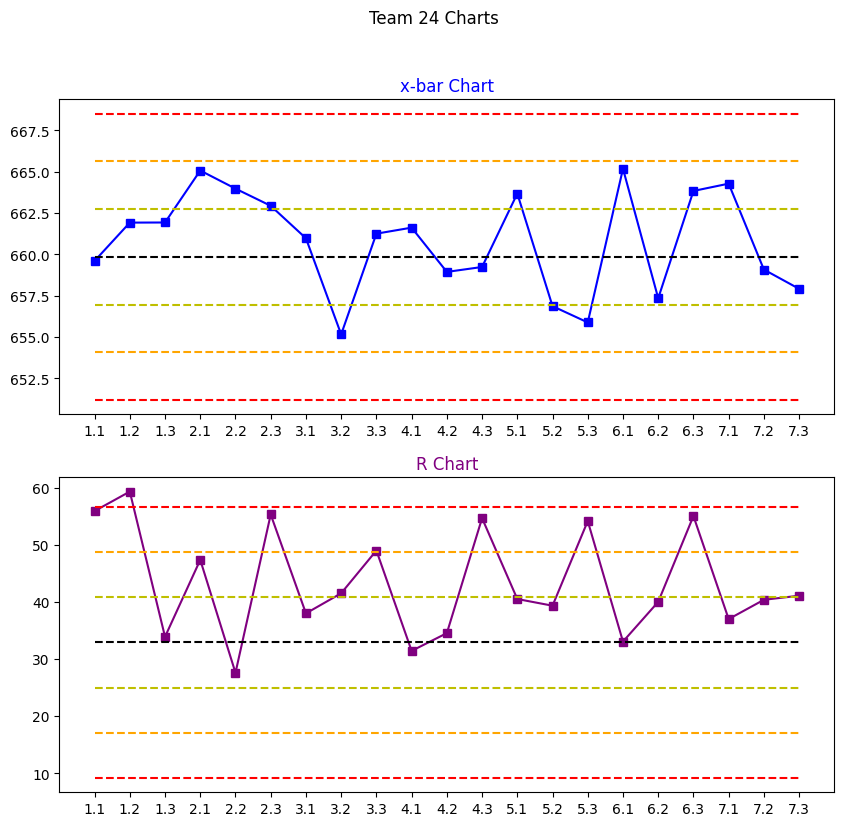

In [23]:
fig = pf.DrawCombinedxBarAndRCharts(xLabels, xBarValues, RValues, xBar_CL, xBar_UCL, xBar_LCL, R_CL, R_UCL, R_LCL)
fig.suptitle('Team ' + str(team) + ' Charts')
plt.show

# Mark any out-of-control observations and trends

THIS IS WHERE I'VE LEFT OFF.... DONT KNOW HOW WE WANT TO MARK

[[1, '1.1', 659.601750494872]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176], [1, '1.3', 661.9253166427185]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176], [1, '1.3', 661.9253166427185], [1, '2.1', 665.0681834874841]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176], [1, '1.3', 661.9253166427185], [1, '2.2', 663.9726643873319]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176], [1, '1.3', 661.9253166427185], [1, '2.3', 662.9350878333524]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176], [1, '1.3', 661.9253166427185], [1, '3.1', 660.9704900356963]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176], [1, '1.3', 661.9253166427185], [1, '3.2', 655.1569304354072]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176], [1, '1.3', 661.9253166427185], [1, '3.3', 661.2488807305131]]
[[1, '1.1', 659.601750494872], [1, '1.2', 661.9174972930176], [1, '1.3

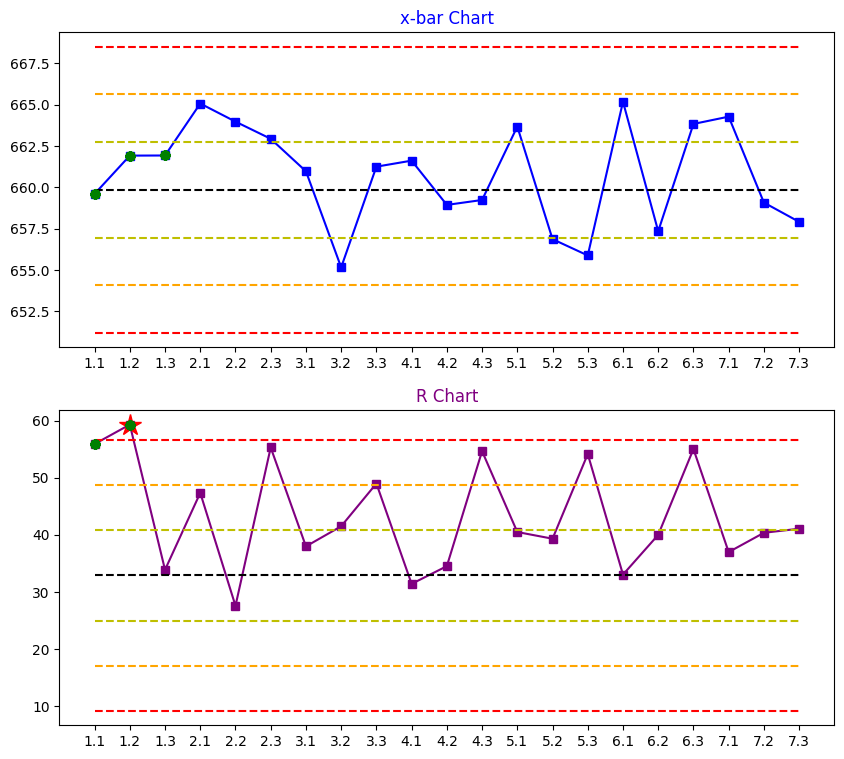

In [37]:
# plt.get_current_fig_manager()
fig = pf.DrawCombinedxBarAndRCharts(xLabels, xBarValues, RValues, xBar_CL, xBar_UCL, xBar_LCL, R_CL, R_UCL, R_LCL)
R_CHART = fig.axes[1]
X_CHART = fig.axes[0]
pts = [[row["Sample_ID"], row["xBar"], row["R"]] for index, row in df[df['Team']==team].iterrows()]

prev_x = []
prev_r = []
for i, [x, xbar, r] in enumerate(pts):    
    # check xbar
    if(xbar > xBar_UCL or xbar < xBar_LCL):
        X_CHART.scatter(x, xbar, marker="x", color="red")

    prev_x.append([1 if xbar > 2*xBar_UCL/3 else -1 if xbar < 2*xBar_LCL/3 else 0, x, xbar])
    print(prev_x)
    if len(prev_x) > 3: 
        prev_x.pop()
    if sum([a for a,x,bar in prev_x]) >= 2:
        for res, plotx, ploty in prev_x:
            if res == 1: X_CHART.plot(plotx, ploty, marker='o', color="green" )
    if sum([a for a,x,xbar in prev_x]) <= -2:
        for res, plotx, ploty in prev_x:
            if res == -1: X_CHART.plot(plotx, ploty, marker='o', color="green" )

    

    # check R
    if(r > R_UCL or r < R_LCL):
        R_CHART.plot(x, r, marker="*", color="red", markersize=16)

    prev_r.append([1 if r > 2*(R_UCL)/3 else -1 if r < 2*R_LCL/3 else 0, x, r])
    if len(prev_r) > 3: 
        prev_r.pop()
    if sum([a for a,x,r in prev_r]) >= 2:
        for res, plotx, ploty in prev_r:
            if res == 1: R_CHART.plot(plotx, ploty, marker='o', color="green" )
    if sum([a for a,x,r in prev_r]) <= -2:
        for res, plotx, ploty in prev_r:
            if res == -1: R_CHART.plot(plotx, ploty, marker='o', color="green" )


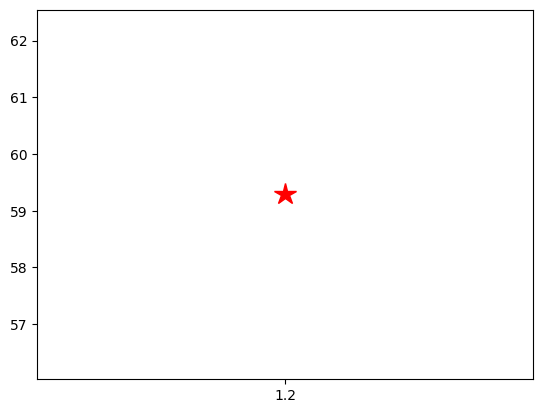

In [ ]:
for index, row in df[df['Team']==team].iterrows():    
    # check xbar
    if(row["xBar"] > xBar_UCL or row["xBar"] < xBar_LCL):
        fig.scatter(row["Sample_ID"], row["xBar"], marker="x", color="red")

    

    # check R
    if(row["R"] > R_UCL or row["R"] < R_LCL):
        plt.plot(row["Sample_ID"], row["R"], marker="*", color="red", markersize=16)
fig.axes[0].plot(["2.1","2.2","2.3"], [665,664,663], marker="*", linestyle="dashed", color="red")

# Process Capability

In [ ]:
Cpk = 1#Must change this
Cpk

1